<a href="https://colab.research.google.com/github/LamaBimal/IIMS_AI/blob/main/IIMS_dibetics_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

In [ ]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [ ]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [ ]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [ ]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    # print(data.loc[:,col])

In [ ]:
# print(col)
# data.loc[:,col].median()

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,23,30.5,30.1,0.349,47,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


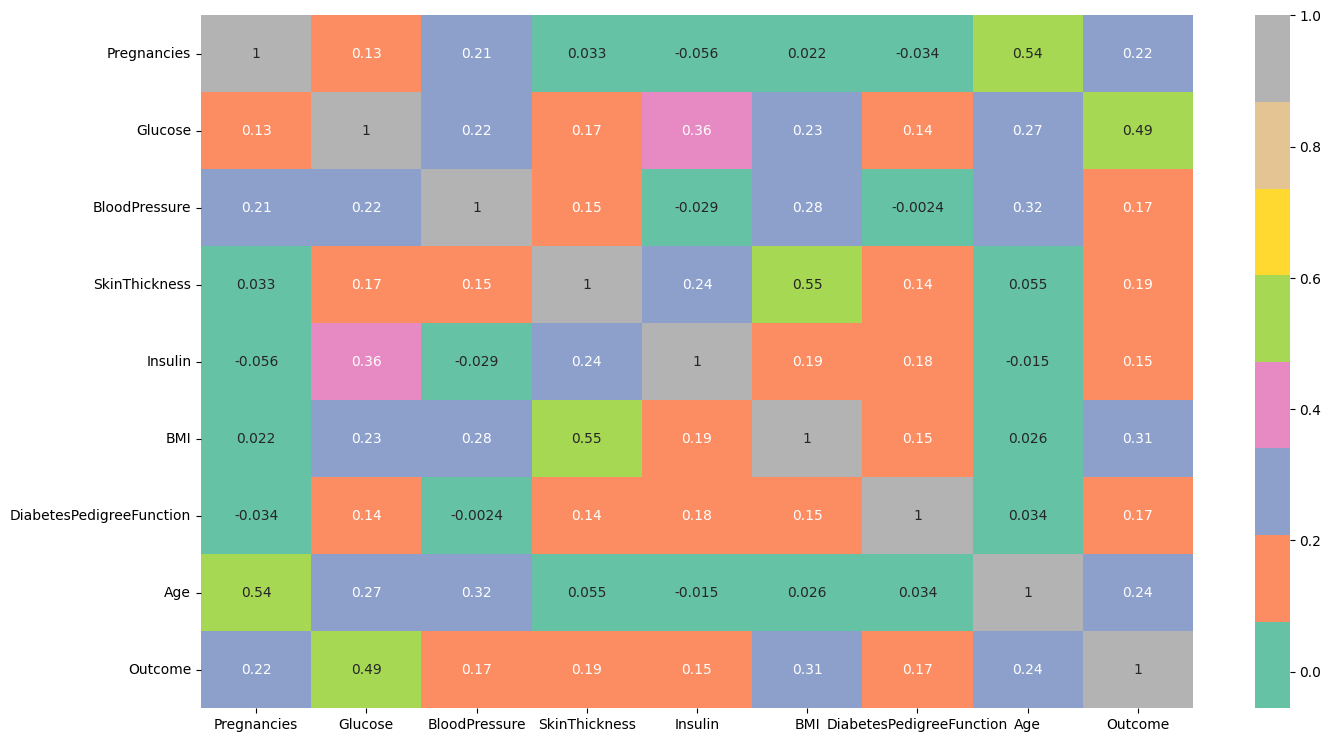

In [ ]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()


In [ ]:
# training and normalization of data
X = data.iloc[:,:8].values
Y = data.iloc[:,8:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [ ]:
# # Fitting Linear Regression to the dataset
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(X_train,Y_train)

In [ ]:
X_test

array([[7.00e+00, 1.36e+02, 7.40e+01, ..., 2.60e+01, 6.47e-01, 5.10e+01],
       [1.00e+00, 1.51e+02, 6.00e+01, ..., 2.61e+01, 1.79e-01, 2.20e+01],
       [6.00e+00, 1.09e+02, 6.00e+01, ..., 2.50e+01, 2.06e-01, 2.70e+01],
       ...,
       [8.00e+00, 1.88e+02, 7.80e+01, ..., 4.79e+01, 1.37e-01, 4.30e+01],
       [5.00e+00, 1.36e+02, 8.20e+01, ..., 3.20e+01, 6.40e-01, 6.90e+01],
       [4.00e+00, 9.00e+01, 7.20e+01, ..., 2.80e+01, 6.10e-01, 3.10e+01]])

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, max_iter=1000)
model.fit(X_train,Y_train)


prediction = model.predict(X_test)
print(prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 1 0]


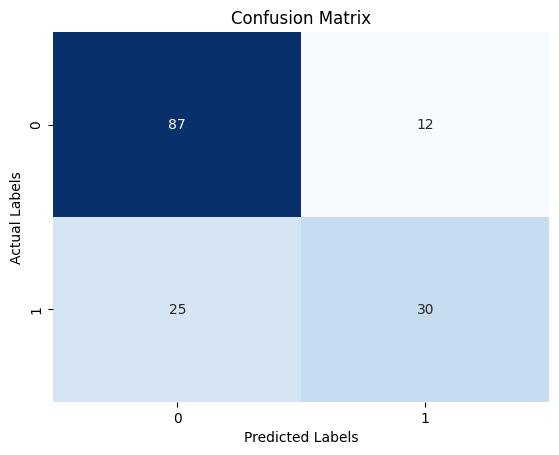

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154

